In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk 
from nltk.corpus import stopwords 
import string
import collections

import seaborn as sns
from wordcloud import WordCloud 

import re
import spacy #I have issues with spacy

In [172]:
raw_data = pd.read_csv("all_reviews.csv")
raw_data.head()

Airline  Review ID Date Published  Overall Rating Passenger Country  \
0   scoot     891669     2024-03-26               3         Australia   
1   scoot     891535     2024-03-24               1          Malaysia   
2   scoot     891527     2024-03-24               9         Singapore   
3   scoot     891411     2024-03-22               7     United States   
4   scoot     891340     2024-03-21               4         Australia   

   Trip Verified                              Review Title  \
0   Not Verified             "not recommend flying Scoot"    
1  Trip Verified               "whole cabin is like sauna"   
2  Trip Verified      "professional, helpful and friendly"   
3  Trip Verified  "seat pitch is generous and comfortable"   
4  Trip Verified         "Very rude male flight attendant"   

                                              Review    Aircraft  \
0  My flight to Singapore was uneventful as usual...  Boeing 787   
1  Using super old plane. Aircon was blowing warm...         NaN   
2  I travelled with my sister, my elderly parent ...         NaN   
3  Was assigned last two row at seat 39F with the...    A321 NEO   
4  Very rude male flight attendant. Accessed the ...        A321   

  Type Of Traveller  ... Layover     Date Flown Seat Comfort  \
0      Solo Leisure  ...     NaN  February 2024          1.0   
1      Solo Leisure  ...     NaN     March 2024          1.0   
2    Family Leisure  ...     NaN     March 2024          4.0   
3      Solo Leisure  ...     NaN     March 2024          5.0   
4    Family Leisure  ...     NaN     March 2024          3.0   

  Cabin Staff Service Food & Beverages  Ground Service  Wifi & Connectivity  \
0                 3.0              1.0             3.0                  2.0   
1                 3.0              2.0             3.0                  NaN   
2                 5.0              4.0             5.0                  NaN   
3                 3.0              NaN             2.0                  2.0   
4                 1.0              NaN             4.0                  NaN   

   Value For Money  Recommended  Inflight Entertainment  
0                3           no                     NaN  
1                2           no                     1.0  
2                5          yes                     NaN  
3                5          yes                     NaN  
4                4           no                     NaN  

[5 rows x 23 columns]

In [173]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline                 674 non-null    object 
 1   Review ID               674 non-null    int64  
 2   Date Published          674 non-null    object 
 3   Overall Rating          674 non-null    int64  
 4   Passenger Country       674 non-null    object 
 5   Trip Verified           671 non-null    object 
 6   Review Title            674 non-null    object 
 7   Review                  674 non-null    object 
 8   Aircraft                178 non-null    object 
 9   Type Of Traveller       674 non-null    object 
 10  Seat Type               674 non-null    object 
 11  Origin                  669 non-null    object 
 12  Destination             669 non-null    object 
 13  Layover                 94 non-null     object 
 14  Date Flown              674 non-null    ob

In [174]:
def single_column_analysis(data, col, title, horizontal, show_count, top_10):
    unique_counts = data[col].value_counts().sort_values(ascending = True)
    if top_10:
        unique_counts = unique_counts.tail(10)
    if show_count:
        print(unique_counts)
    if horizontal:
        plt.barh(unique_counts.index, unique_counts.values)
    else:
        plt.bar(unique_counts.index, unique_counts.values)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count of Each {title}')
    plt.show()  

Overall Rating
6      13
5      19
7      20
9      22
4      25
10     30
8      35
3      44
2      75
1     391
Name: count, dtype: int64


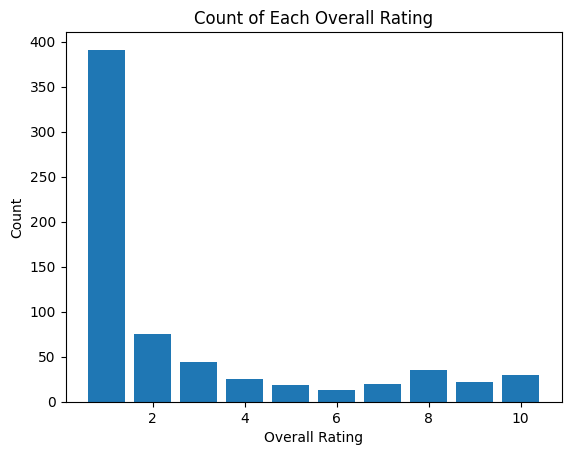

In [175]:
# Check ratings
single_column_analysis(raw_data, "Overall Rating", "Overall Rating", 0, 1, 0)

Trip Verified
Verified Review      2
Not Verified       177
Trip Verified      492
Name: count, dtype: int64


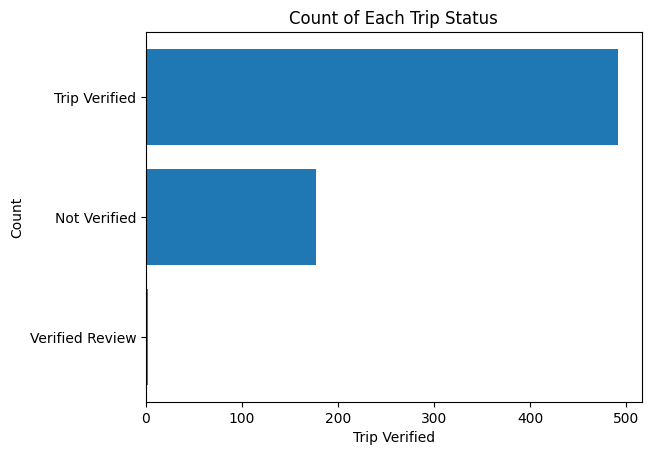

In [176]:
# Trip verified
single_column_analysis(raw_data, "Trip Verified", "Trip Status", 1, 1, 0)

Seat Comfort
5.0     42
4.0     55
2.0    114
3.0    116
1.0    286
Name: count, dtype: int64


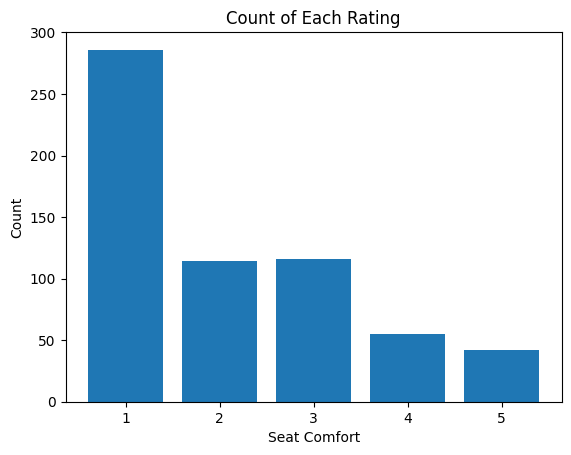

Cabin Staff Service
4.0     74
5.0     77
2.0    106
3.0    110
1.0    232
Name: count, dtype: int64


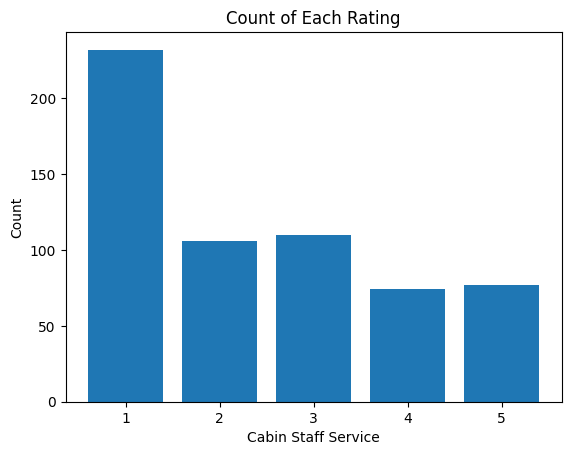

Food & Beverages
5.0     20
4.0     30
2.0     37
3.0     43
1.0    210
Name: count, dtype: int64


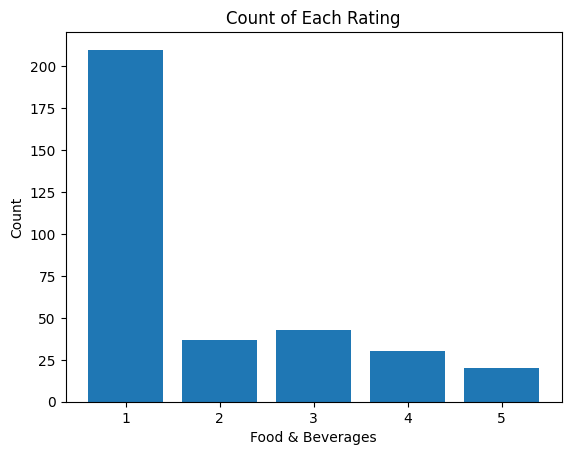

Ground Service
4.0     58
3.0     59
5.0     64
2.0     69
1.0    397
Name: count, dtype: int64


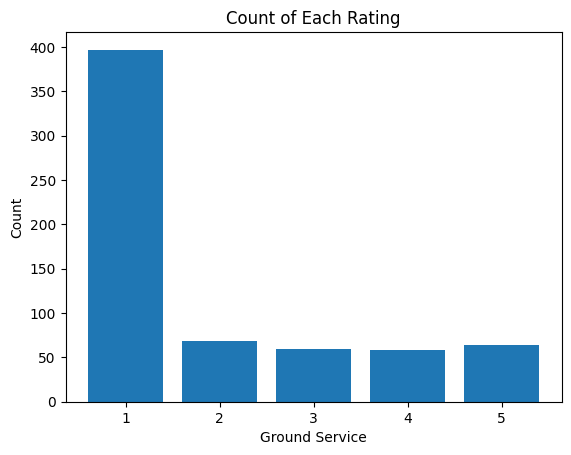

Wifi & Connectivity
5.0      9
3.0     10
4.0     13
2.0     17
1.0    173
Name: count, dtype: int64


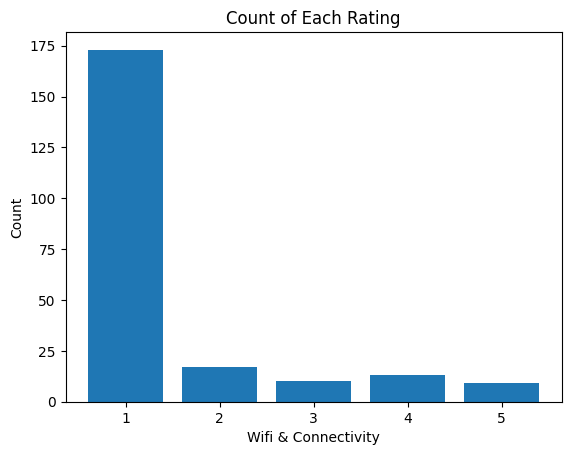

Value For Money
4     51
3     60
5     80
2     85
1    398
Name: count, dtype: int64


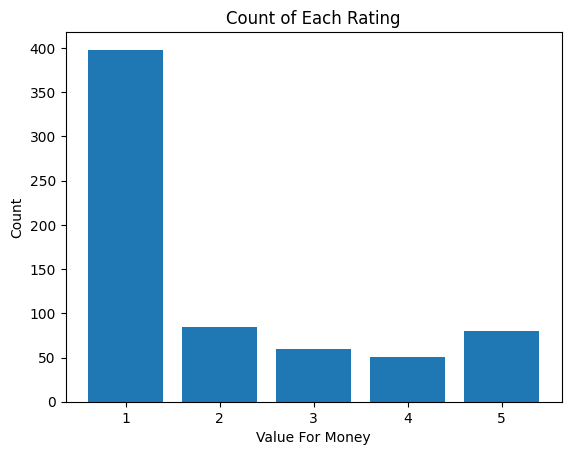

Inflight Entertainment
4.0      6
5.0      7
2.0     12
3.0     16
1.0    184
Name: count, dtype: int64


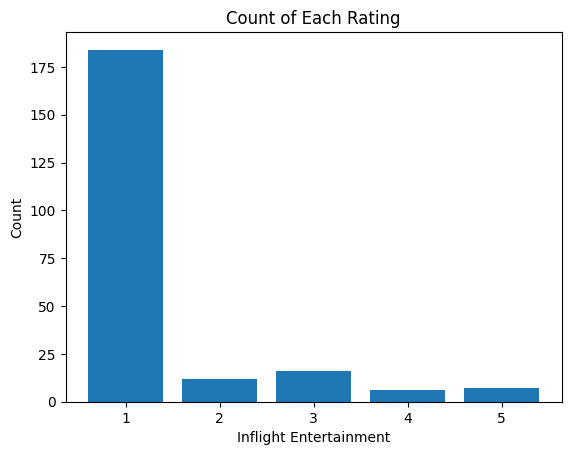

In [177]:
#Other reviews
#Note sum of count are different because some rows do not have the review
lst = ["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Wifi & Connectivity", "Value For Money", "Inflight Entertainment"]
for col in lst:
    single_column_analysis(raw_data, col, "Rating", 0, 1, 0)

Recommended
yes    125
no     549
Name: count, dtype: int64


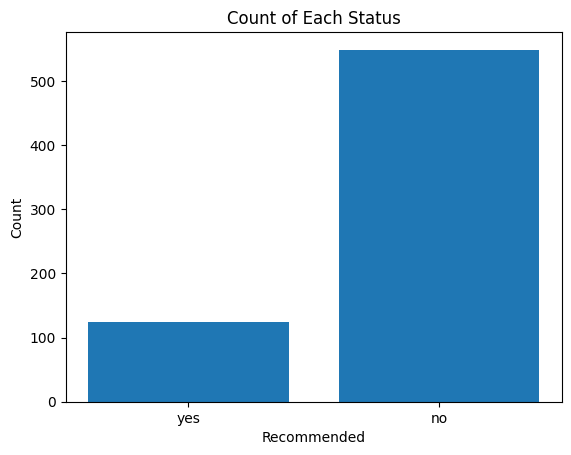

In [178]:
#Recommended
single_column_analysis(raw_data, "Recommended", "Status", 0, 1, 0)

Origin
Cebu            15
Bangkok         20
Tokyo           22
Jakarta         26
Kuala Lumpur    26
Melbourne       28
Denpasar        28
Sydney          37
Manila          46
Singapore       64
Name: count, dtype: int64


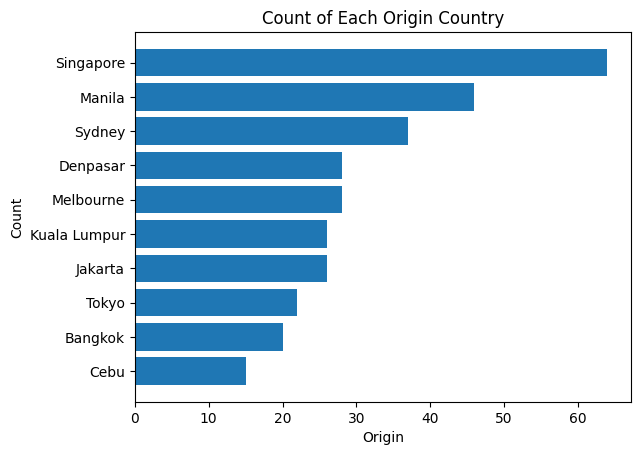

In [179]:
#Origin
single_column_analysis(raw_data, "Origin", "Origin Country", 1, 1, 1)

Destination
Bali            20
Kuala Lumpur    21
Denpasar        22
Melbourne       22
Tokyo           26
Bangkok         31
Sydney          33
Manila          36
Jakarta         38
Singapore       46
Name: count, dtype: int64


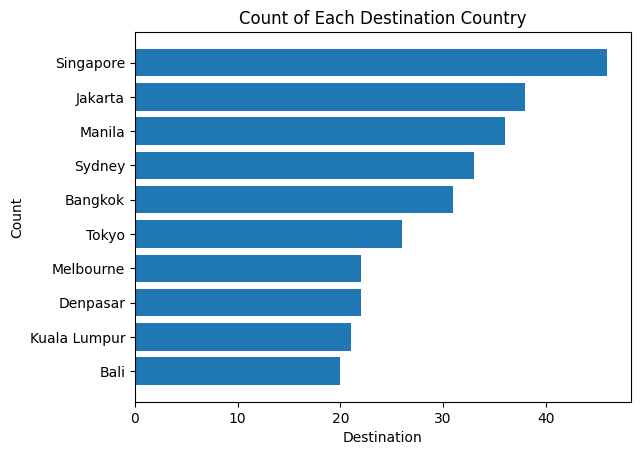

In [180]:
#Destination
single_column_analysis(raw_data, "Destination", "Destination Country", 1, 1, 1)

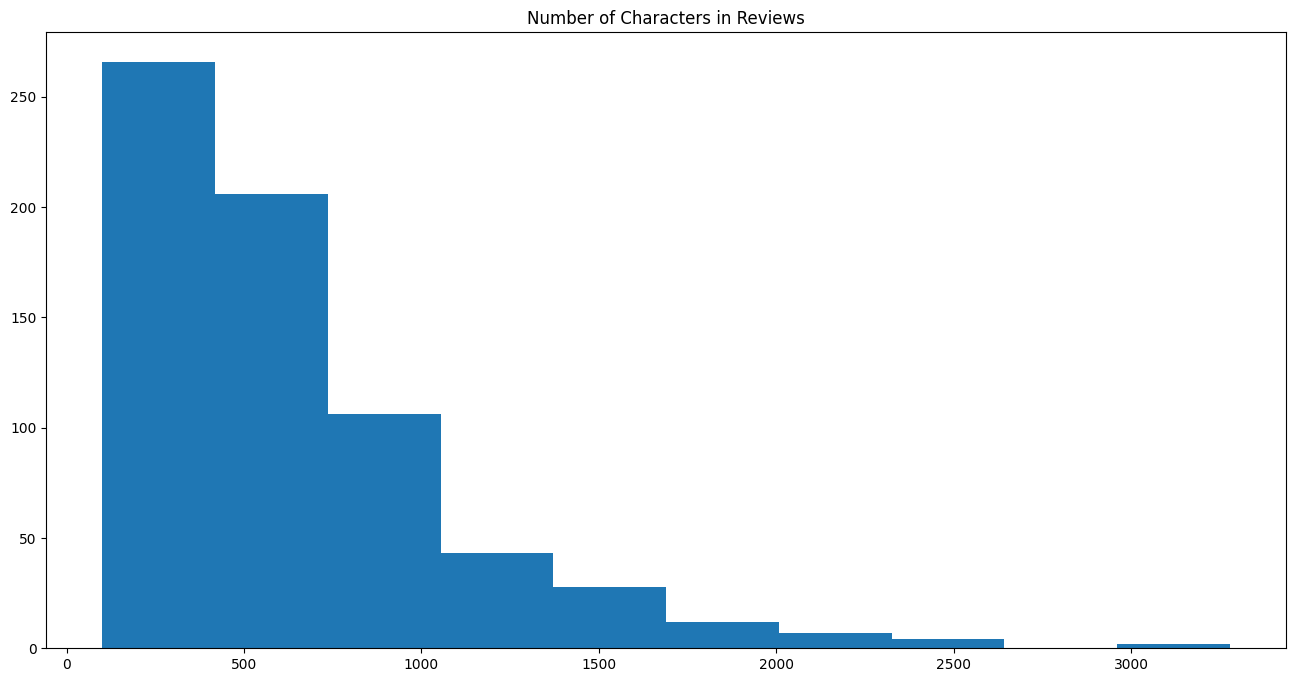

In [181]:
#Reviews
review_len = raw_data['Review'].str.len()

plt.figure(figsize=(16,8))
plt.hist(review_len)
plt.title('Number of Characters in Reviews')

plt.show()

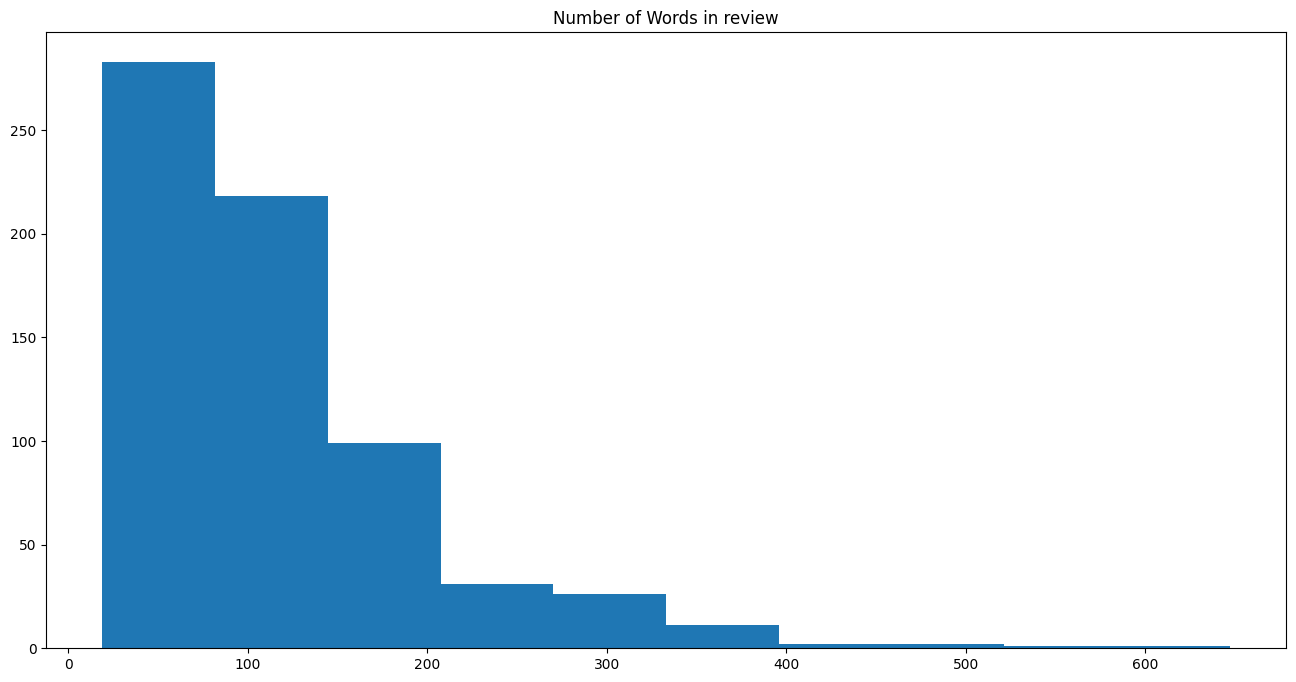

In [182]:
review_words = raw_data['Review'].str.split().map(lambda text: len(text))

plt.figure(figsize=(16,8))
plt.hist(review_words)
plt.title('Number of Words in review')

plt.show()

In [183]:
#Analyse reviews
STOPWORDS = stopwords.words('english')
STOPWORDS.extend(["would", "get", "-", "us", "also", "one", "said", "even", "told", "take", "try", "go", "give", "use", "flight", "airline"])
STOPWORDS.extend(["cebu","indigo","scoot","airasia","jetstar","lion","zipair","pacific"])
print(STOPWORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [184]:
def create_corpus(column,df):
    corpus = []
    
    for sentence in df[column].str.split():
        for word in sentence:
            corpus.append(word.lower())
    
    return corpus

<BarContainer object of 20 artists>

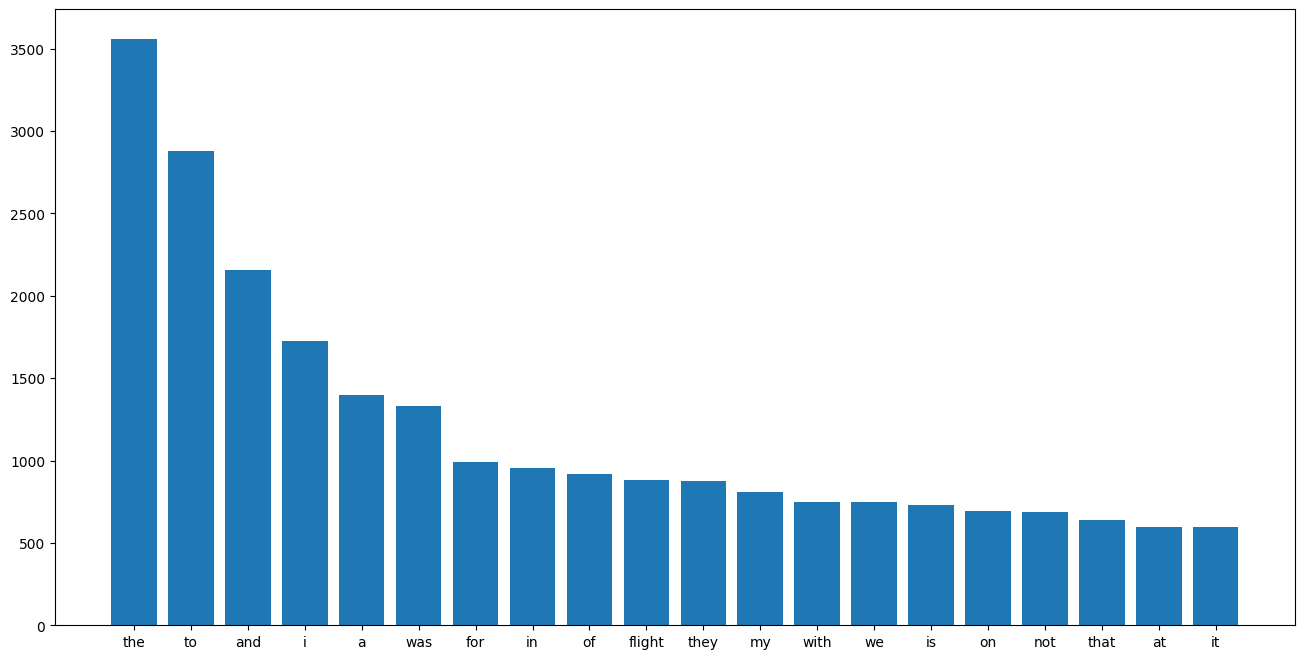

In [185]:
#Top 20 most common stopwords
corpus = create_corpus("Review", raw_data)
dic = collections.defaultdict(int)

for word in corpus:
    if word in STOPWORDS:
        dic[word] += 1

x, y = zip(*sorted(dic.items(), key=lambda word: word[1], reverse=True)[:20])

plt.figure(figsize=(16, 8))
plt.bar(x, y)

<BarContainer object of 20 artists>

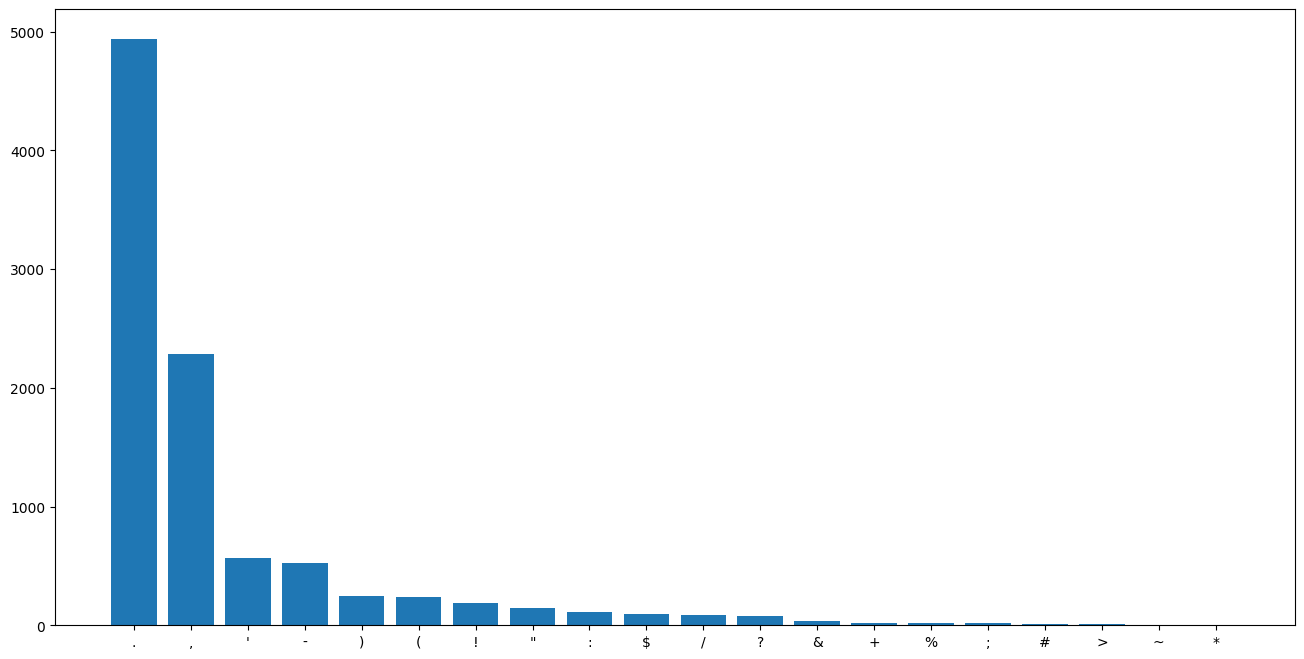

In [186]:
#Top 20 punctuations
corpus = create_corpus("Review", raw_data)
dic = collections.defaultdict(int)

for word in corpus:
    for char in word:
        if char in string.punctuation:
            dic[char] += 1

x, y = zip(*sorted(dic.items(), key=lambda word: word[1], reverse=True)[:20])

plt.figure(figsize=(16,8))
plt.bar(x, y)

c:\Python39\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<AxesSubplot:>

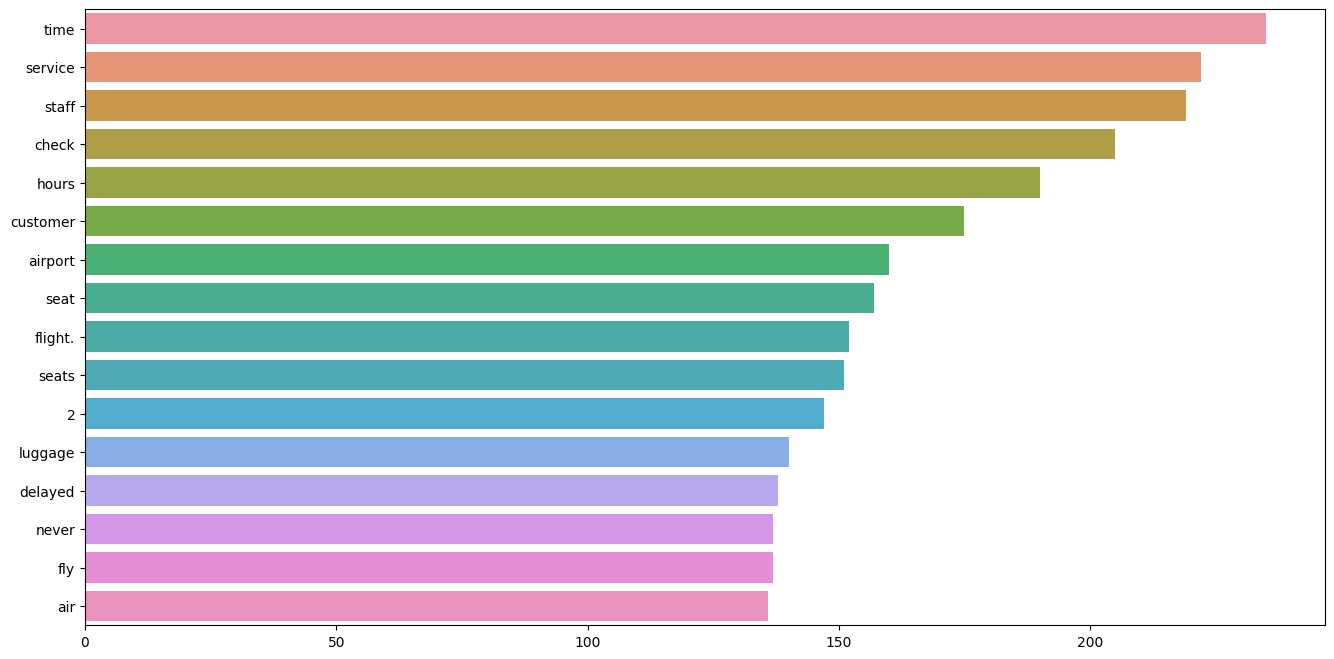

In [187]:
#Find most popular words not in STOPWORDS
corpus = create_corpus("Review", raw_data)
counter = collections.Counter(corpus)
most_common = counter.most_common()

x, y = [], []

for word, count in most_common[:80]:
    if word not in STOPWORDS:
        y.append(word)
        x.append(count)
        
plt.figure(figsize=(16, 8))
sns.barplot(x=x, y=y)

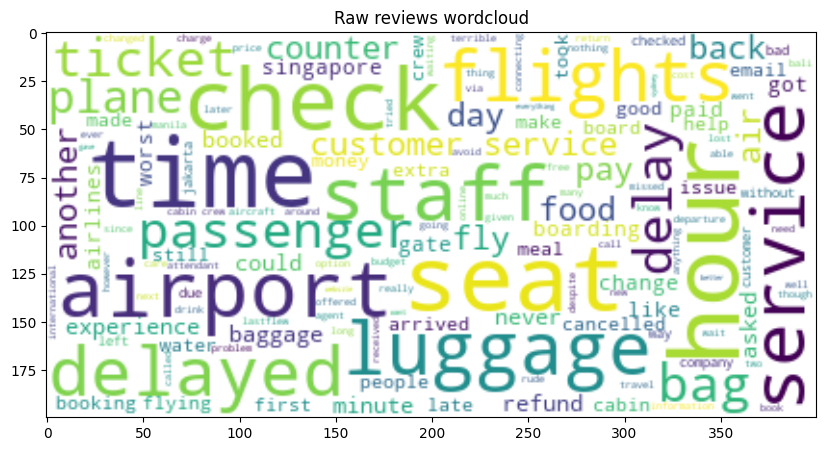

In [188]:
all_words = ' '.join(create_corpus("Review", raw_data))

wordcloud = WordCloud(max_font_size=50, background_color='white', stopwords=STOPWORDS).generate(all_words)

plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Raw reviews wordcloud")

plt.show()

In [189]:
#Preprocess texts
# Steps:
# 1) Apply lowercase
# 2) Remove punctuation
# 3) Remove numbers
# 4) Remove stopwords
# 5) Remove white spaces
# 6) Apply lemmatization

# 1) Apply lowercase
raw_data['review_cleaned'] = raw_data['Review'].apply(lambda text: text.lower())

# 2) Remove punctuations
def remove_punctuation(sentence):
    return ''.join([word for word in str(sentence) if word not in string.punctuation])

raw_data['review_cleaned'] = raw_data['review_cleaned'].apply(lambda text: remove_punctuation(text))

# 3) Remove numbers
def remove_numbers(sentence):
    return re.sub(r'\d+', '', sentence)

raw_data['review_cleaned'] = raw_data['review_cleaned'].apply(lambda text: remove_numbers(text))

# 4) Remove stopwords
def remove_stopwords(sentence):
    return ' '.join([word for word in str(sentence).split() if word not in STOPWORDS])
    
raw_data['review_cleaned'] = raw_data['review_cleaned'].apply(lambda text: remove_stopwords(text))

# 5) Remove white spaces
def remove_spaces(sentence):
    return re.sub(r'\s+', ' ', sentence).strip()

raw_data['review_cleaned'] = raw_data['review_cleaned'].apply(lambda text: remove_spaces(text))

# TODO: Apply lemmatization
# 6) Apply lemmatization
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

def lemmatizer_doc(sentence):
    doc = nlp(sentence)
    new_sentence = [token.lemma_ for token in doc if token.is_alpha]
    
    return ' '.join(new_sentence)

raw_data['review_cleaned'] = raw_data['review_cleaned'].apply(lambda text: lemmatizer_doc(text))

In [190]:
print('Original review\n', raw_data['Review'].iloc[0])
print('\nReview clear\n', raw_data['review_cleaned'].iloc[0])

Original review
 My flight to Singapore was uneventful as usual except the aircraft cleanliness was bad. Upon arrival in Singapore, I found my suitcase badly dented and reported the damaged to Scoot's handling agent, SATS in Singapore. SATS will not handle the damage and directed me to to claim from Scoot Insurance Assessor online. That evening I dutifully submitted the claim with all supporting photos from SATS, boarding pass, etc. Response was prompt however unhelpful, it directed me to claim from my travel insurer which I refused. A reply from the Scoot's assessor requesting the same documents that were submitted in the online claim. Resend. Reply again requesting for same documents. Explained and objected. Reply and requesting for more photos! The whole process made my trip rather unpleasant! I decided to ignore that email. I was only claiming SGD 200 for the 2 year old damaged suitcase. I will definitely not recommend flying Scoot to friends!

Review clear
 singapore uneventful us

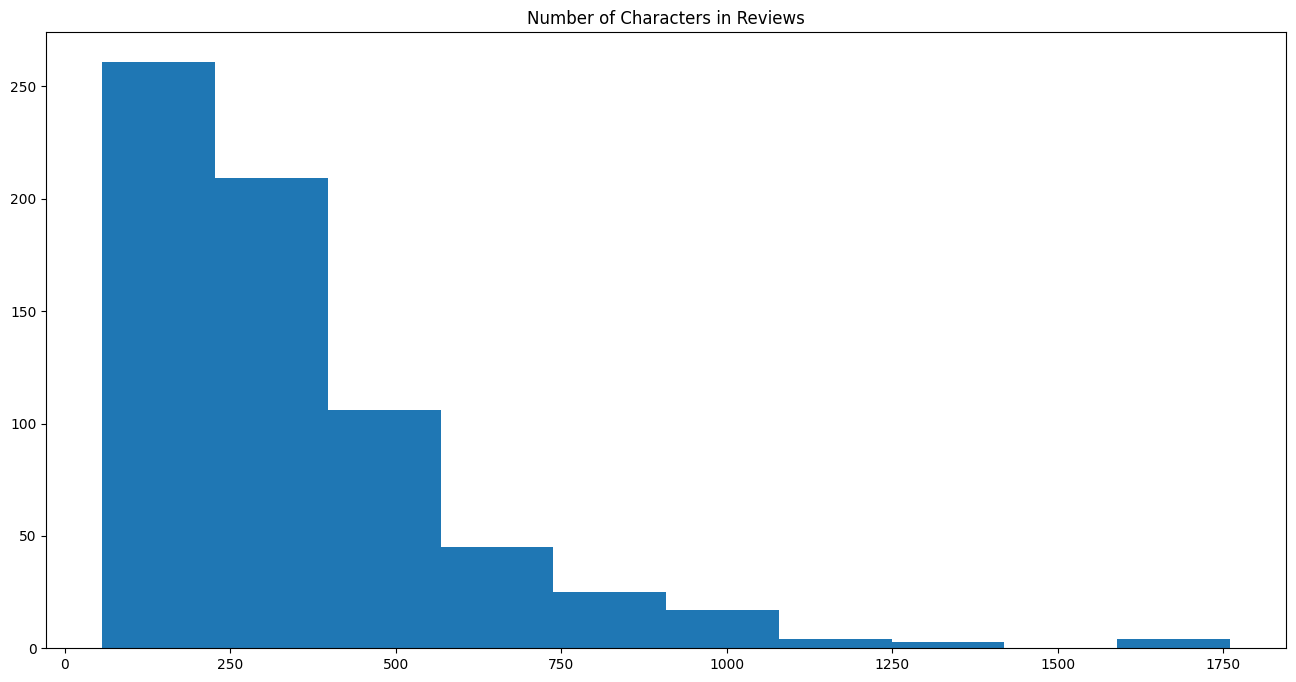

In [191]:
review_len = raw_data['review_cleaned'].str.len()

plt.figure(figsize=(16,8))
plt.hist(review_len)
plt.title('Number of Characters in Reviews')

plt.show()

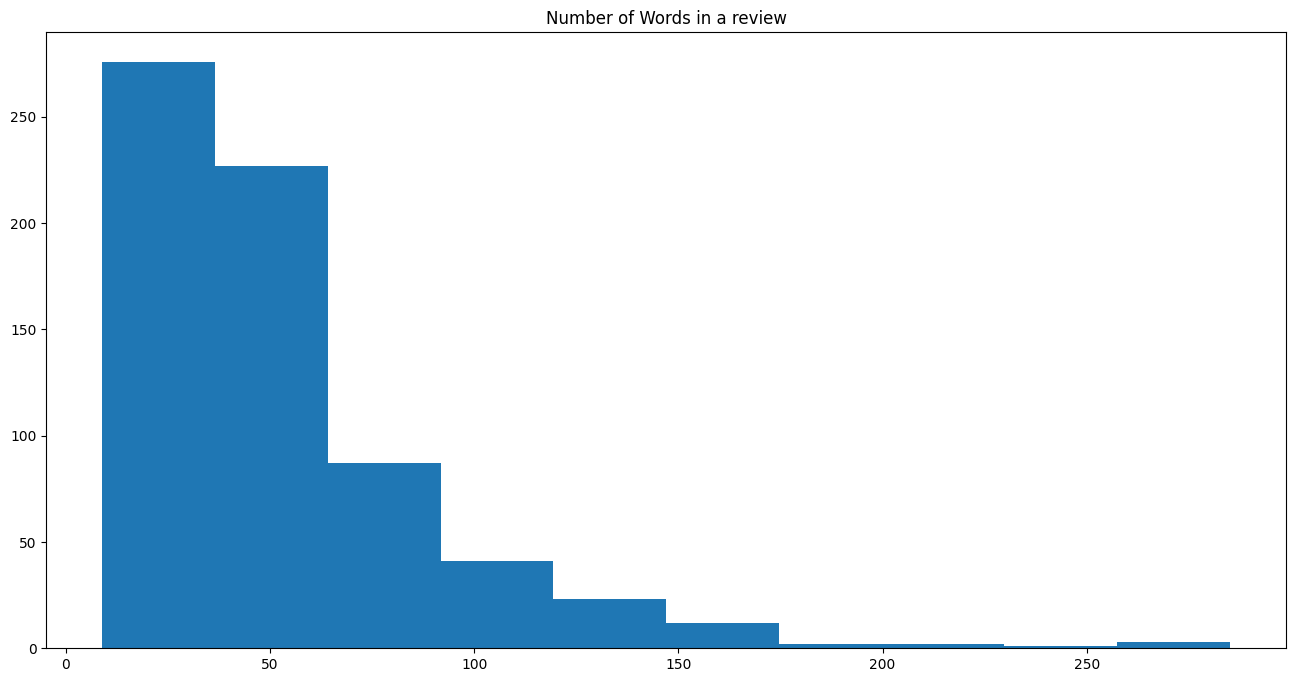

In [192]:
review_words = raw_data['review_cleaned'].str.split().map(lambda text: len(text))

plt.figure(figsize=(16,8))
plt.hist(review_words)
plt.title('Number of Words in a review')

plt.show()

<AxesSubplot:title={'center':'Most common words in cleaned reviews'}, xlabel='Count', ylabel='Word'>

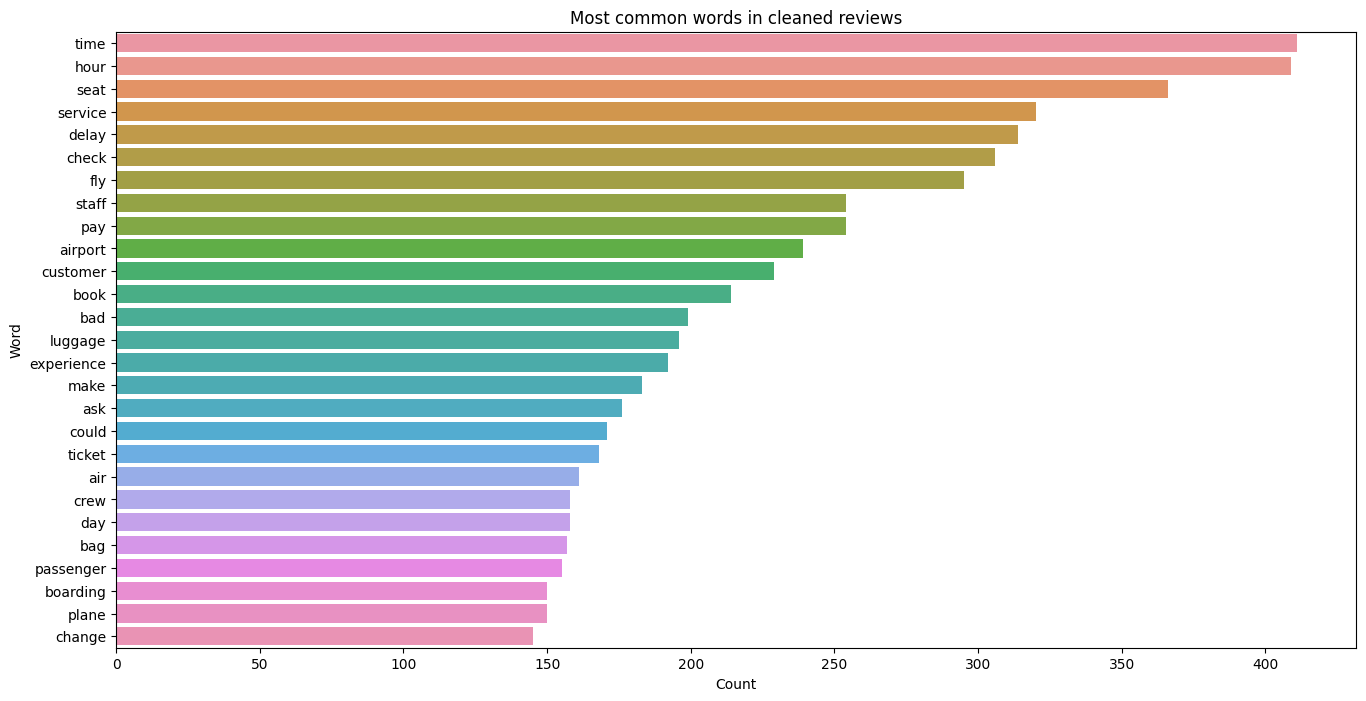

In [193]:
corpus = create_corpus("review_cleaned", raw_data)
counter = collections.Counter(corpus)
most_common = counter.most_common()

x, y = [], []

for word, count in most_common[:30]:
    if word not in STOPWORDS:
        y.append(word)
        x.append(count)
df = pd.DataFrame({'Count': x, 'Word': y})
plt.figure(figsize=(16, 8))
plt.title("Most common words in cleaned reviews")
sns.barplot(x='Count', y='Word', data = df)

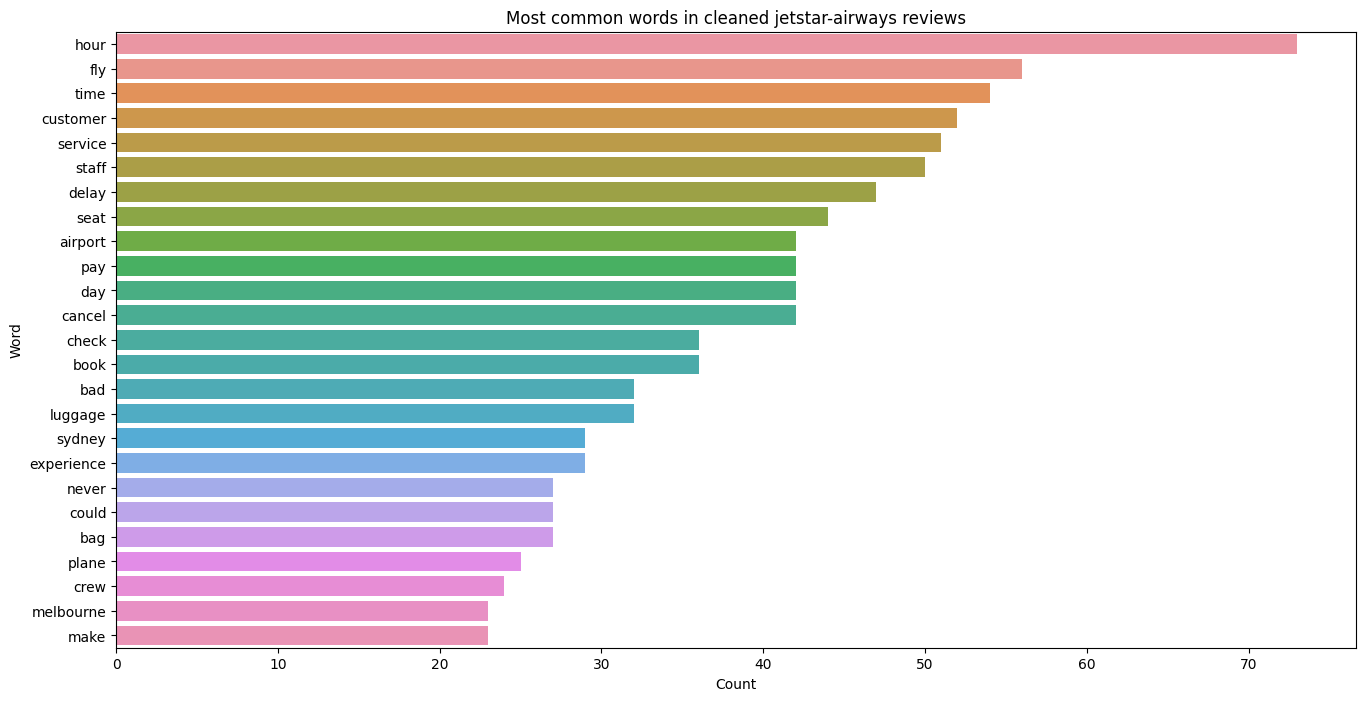

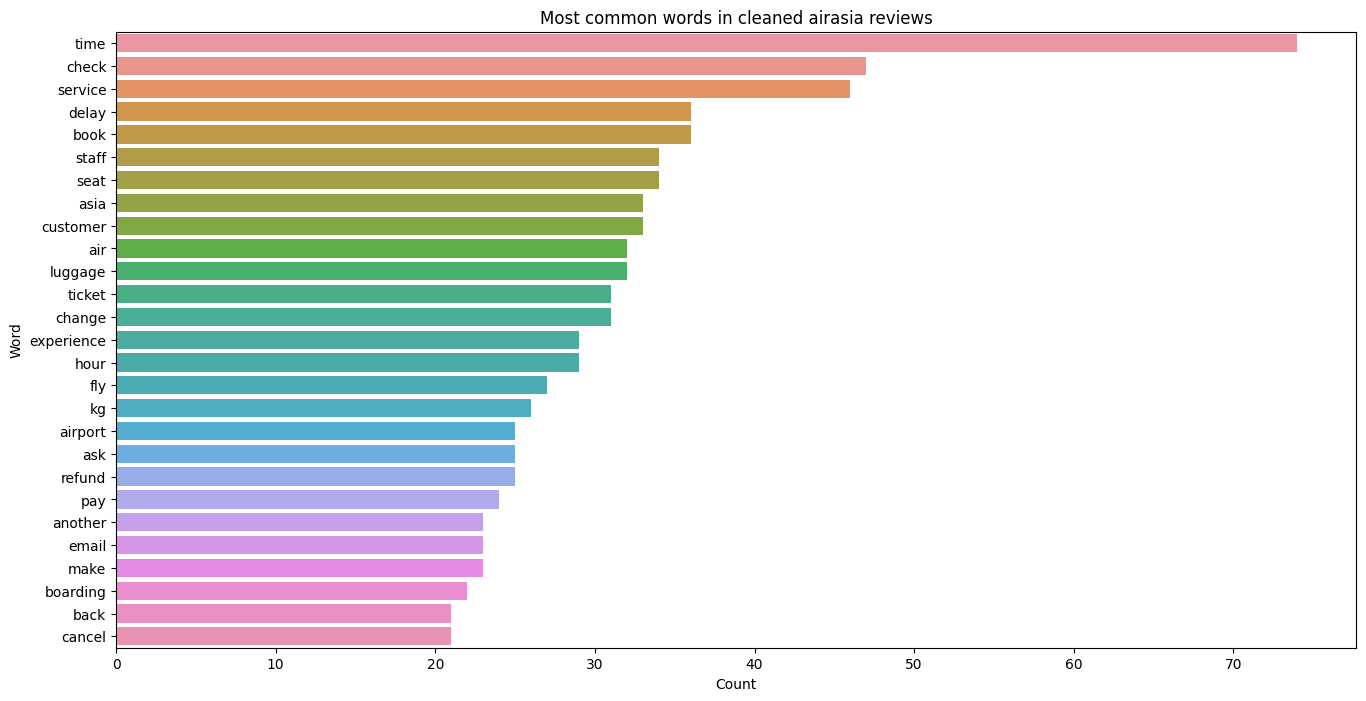

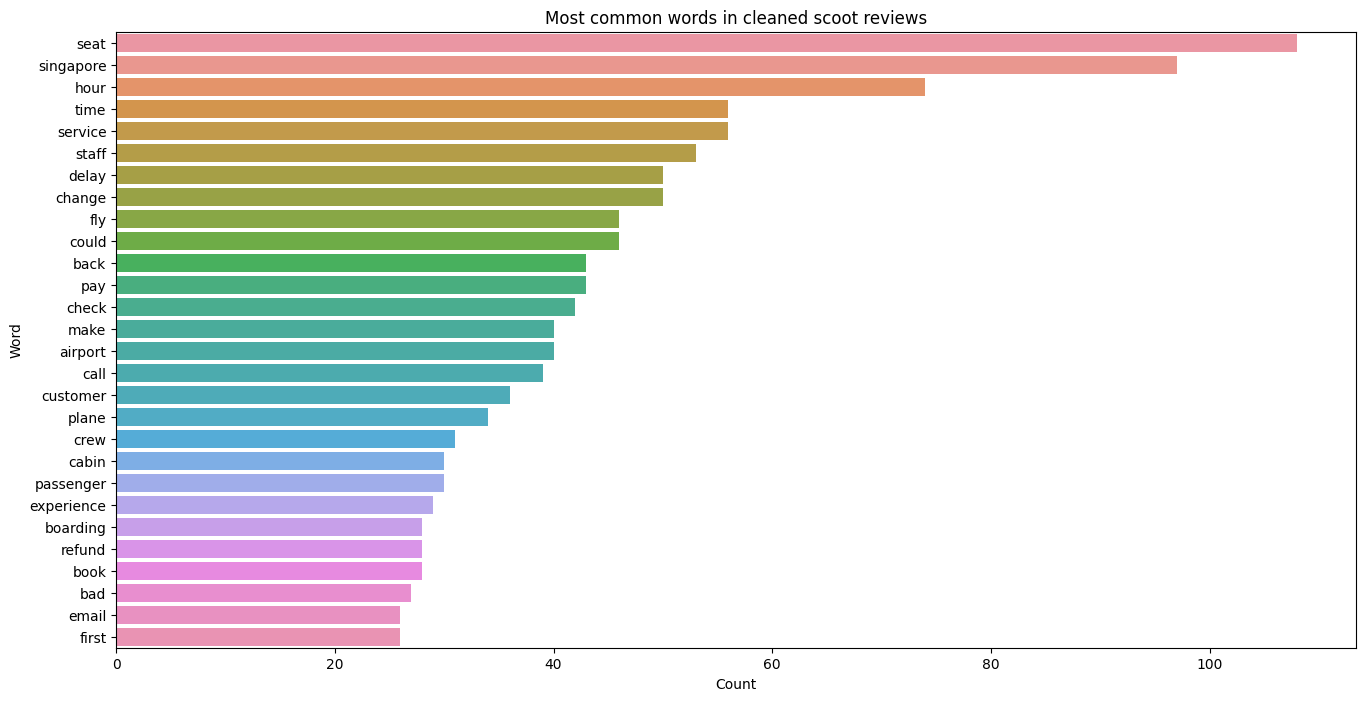

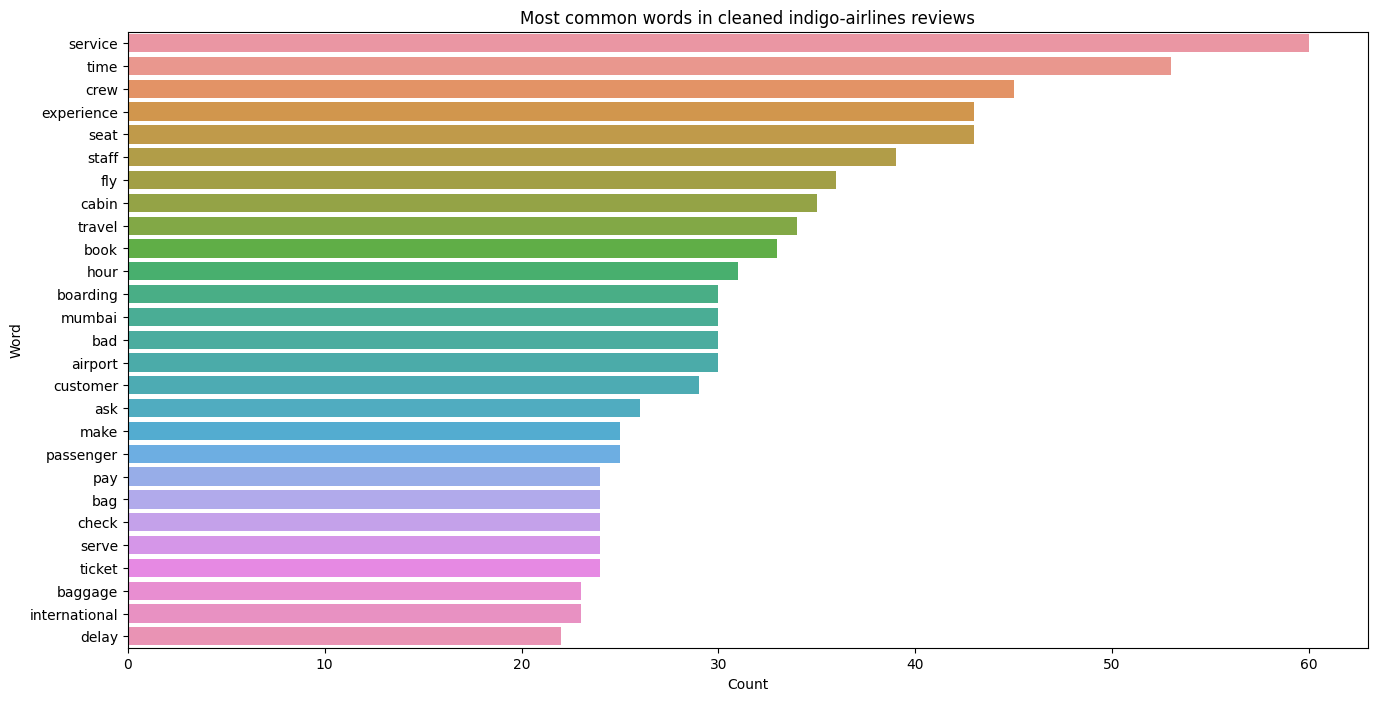

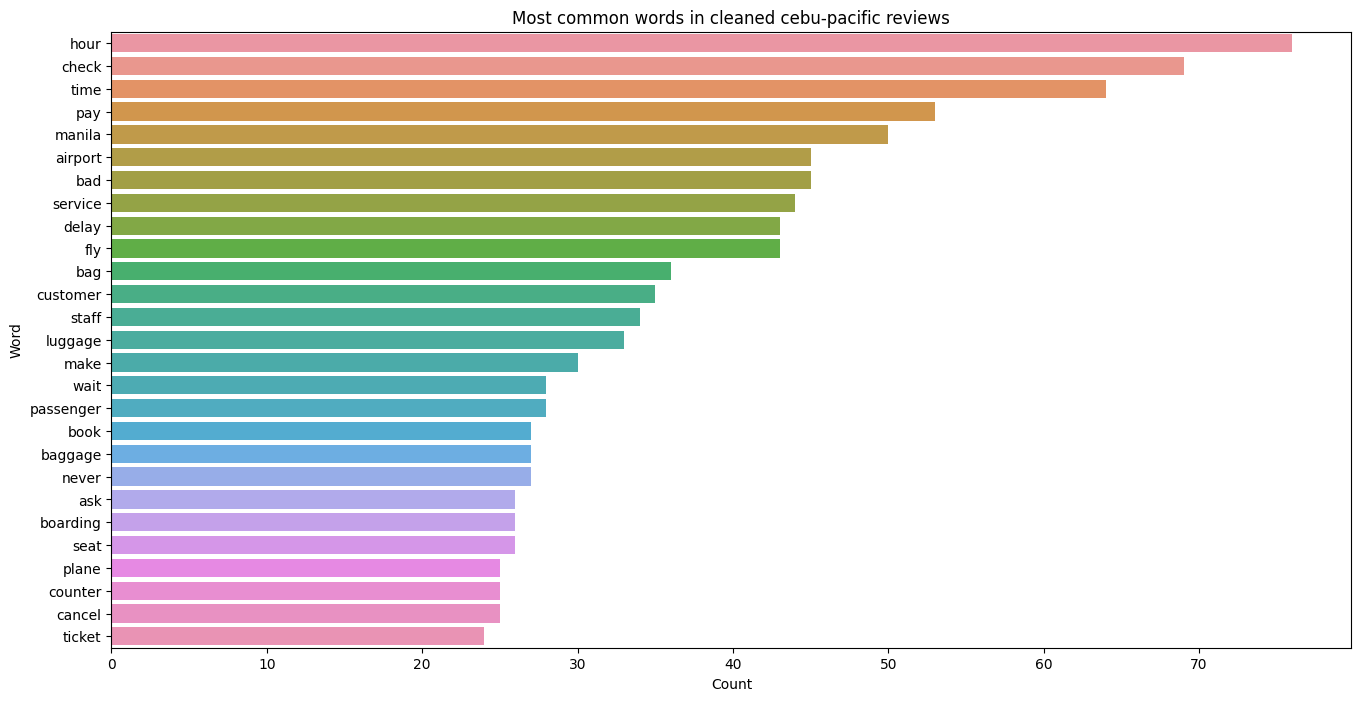

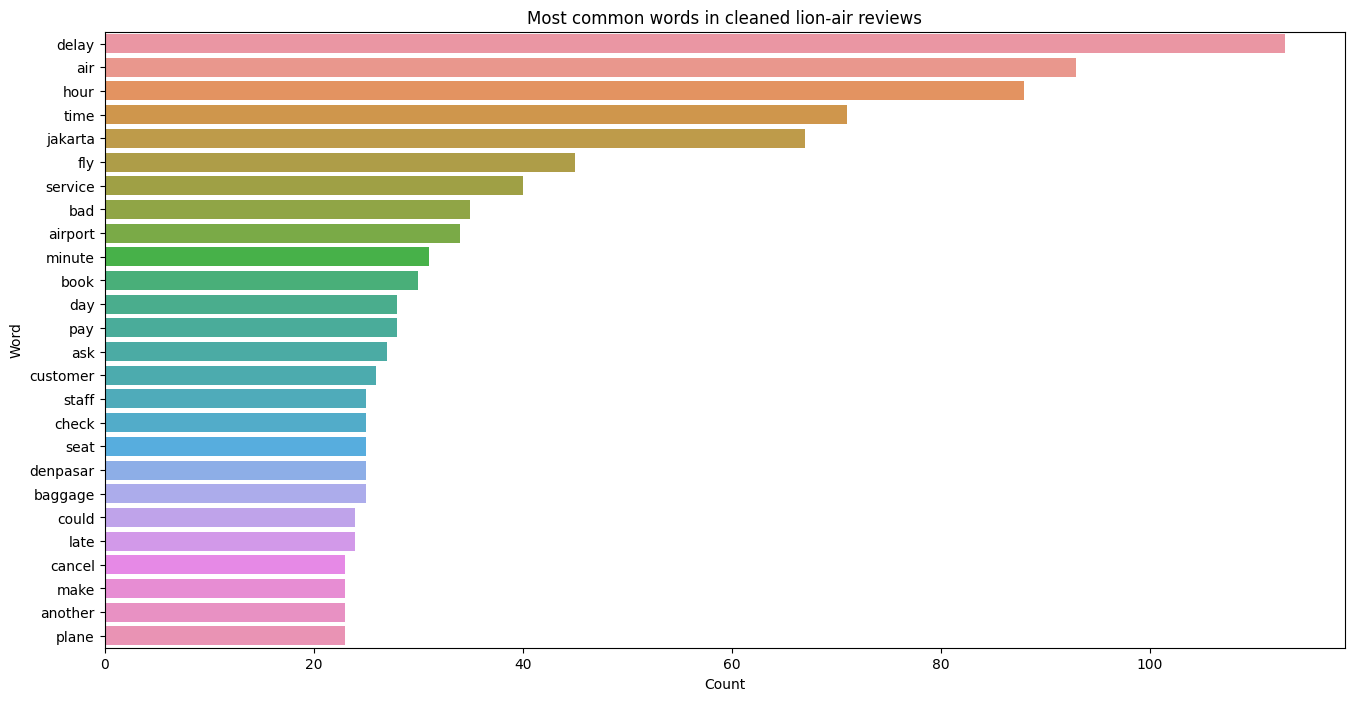

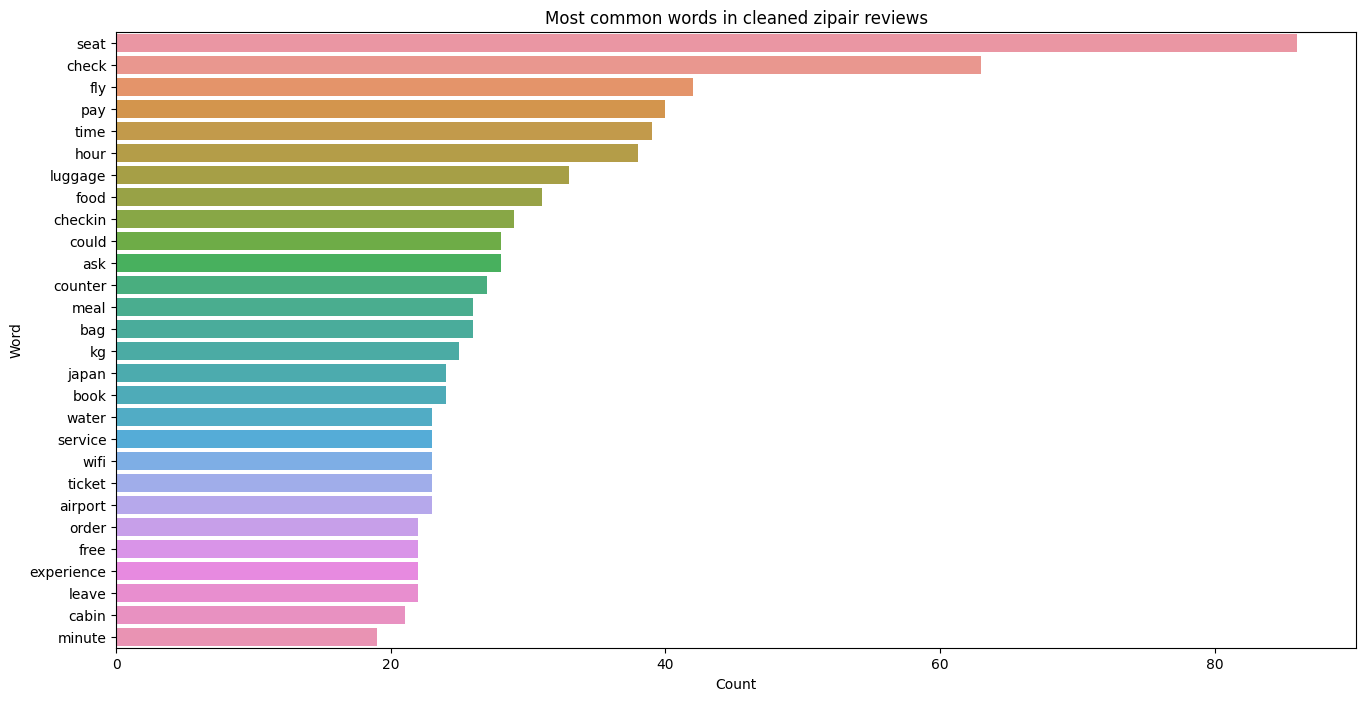

In [194]:
airline_lst = ["jetstar-airways","airasia","scoot","indigo-airlines","cebu-pacific","lion-air","zipair"]

for airline in airline_lst:
    corpus = create_corpus("review_cleaned", raw_data[raw_data["Airline"] == airline])
    counter = collections.Counter(corpus)
    most_common = counter.most_common()

    x, y = [], []

    for word, count in most_common[:30]:
        if word not in STOPWORDS:
            y.append(word)
            x.append(count)
    df = pd.DataFrame({'Count': x, 'Word': y})
    plt.figure(figsize=(16, 8))
    plt.title(f"Most common words in cleaned {airline} reviews")
    sns.barplot(x='Count', y='Word', data = df)

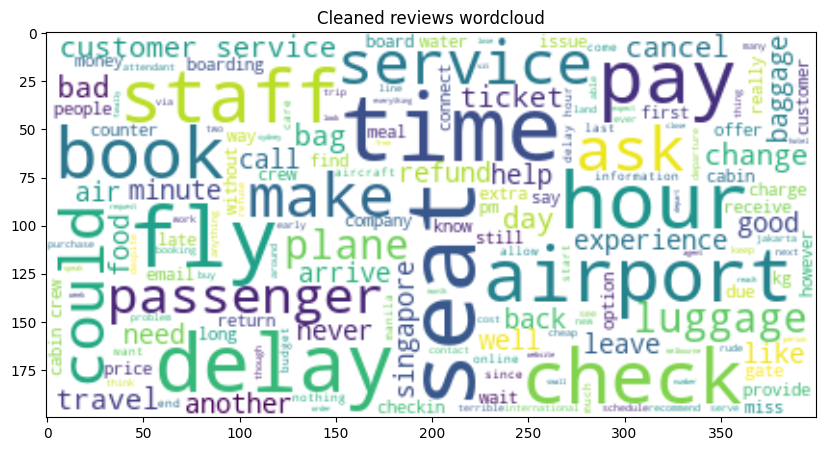

In [195]:
all_words = ' '.join(create_corpus("review_cleaned", raw_data))

wordcloud = WordCloud(max_font_size=50, background_color='white', stopwords=STOPWORDS).generate(all_words)

plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Cleaned reviews wordcloud")

plt.show()

In [196]:
def airline_wordcloud(airline):
    all_words = ' '.join(create_corpus("review_cleaned", raw_data[raw_data["Airline"] == airline]))

    wordcloud = WordCloud(max_font_size=50, background_color='white', stopwords=STOPWORDS).generate(all_words)

    plt.figure(figsize=(15,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cleaned {airline} reviews wordcloud")
    plt.show()

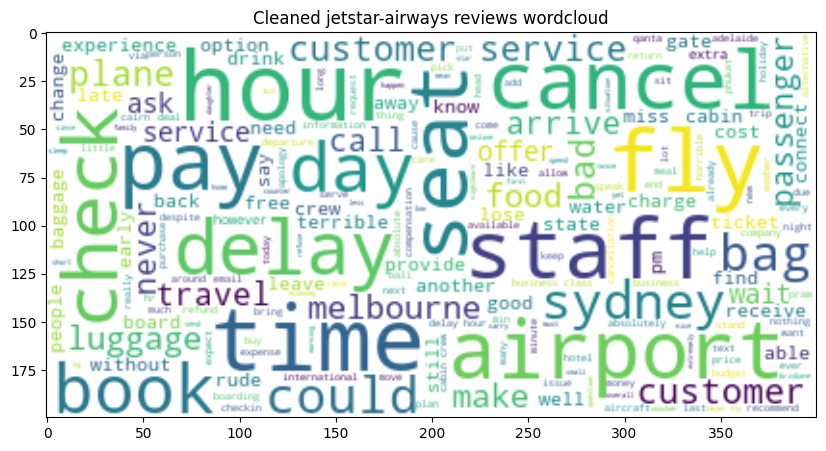

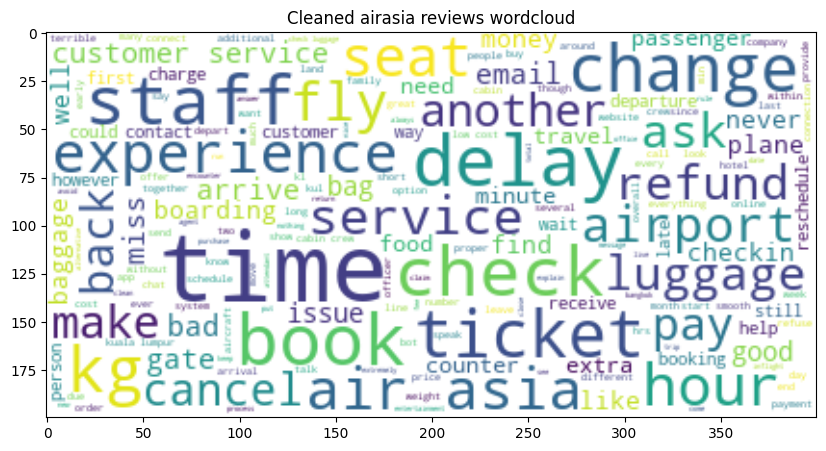

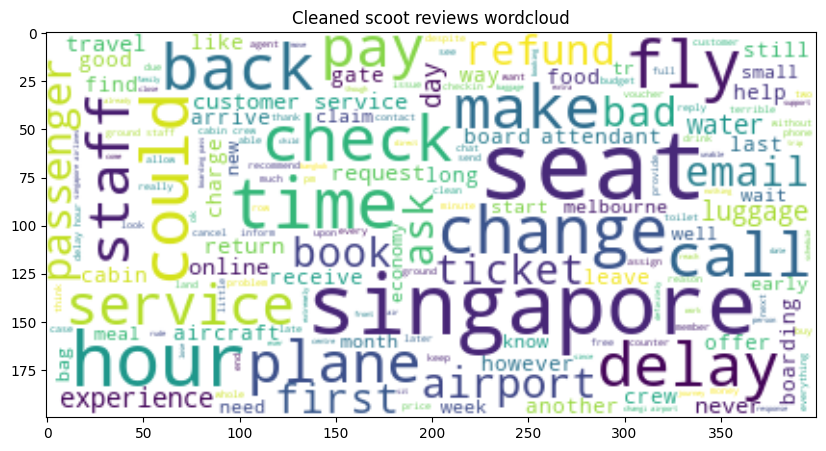

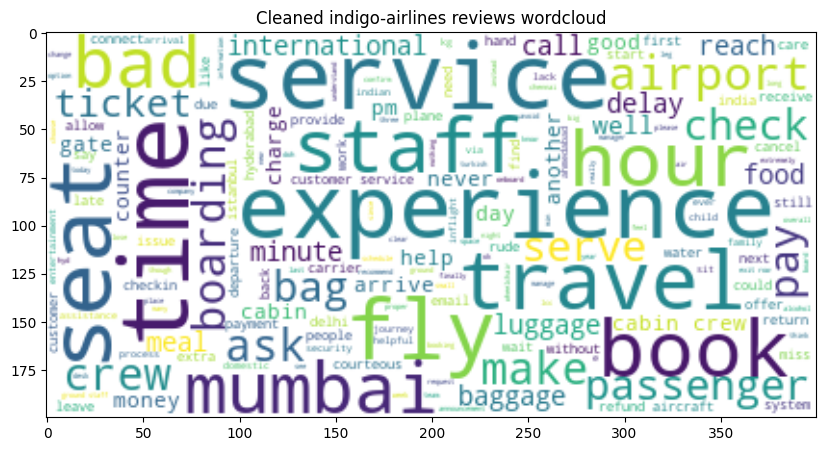

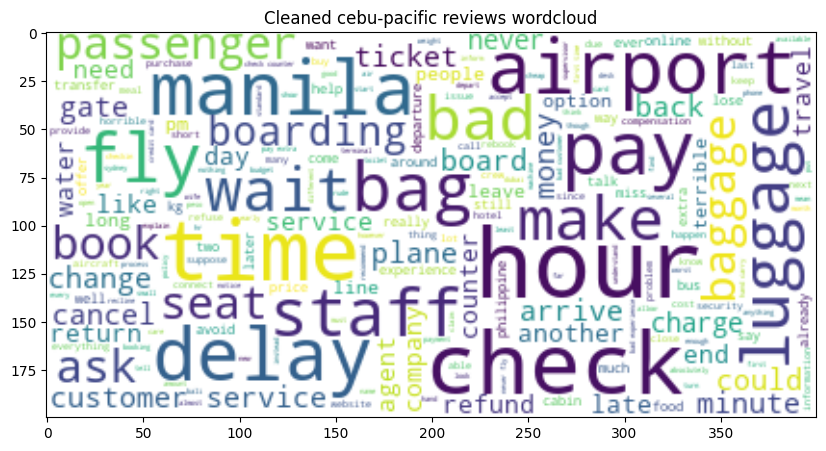

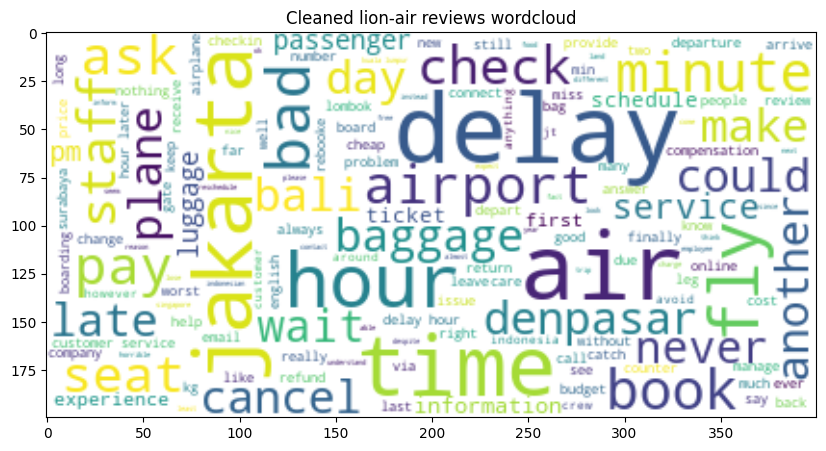

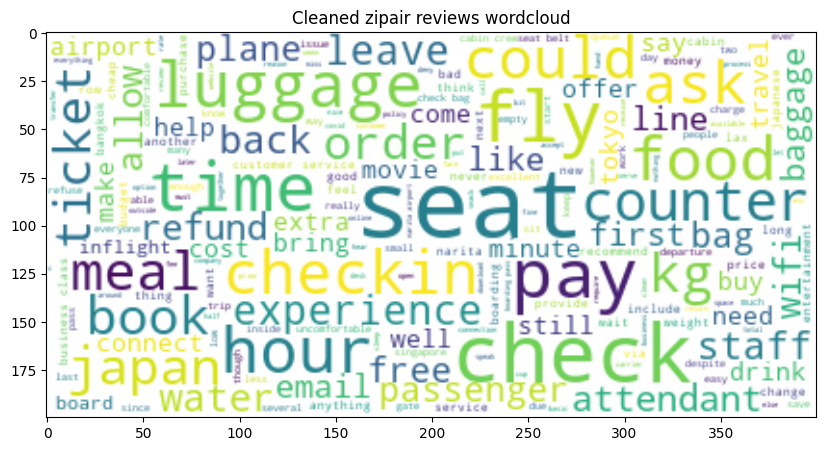

In [197]:
airline_lst = ["jetstar-airways","airasia","scoot","indigo-airlines","cebu-pacific","lion-air","zipair"]

for airline in airline_lst:
    airline_wordcloud(airline)

In [198]:
# Bivariate Analysis
grouped = raw_data[["Airline","Overall Rating","Seat Comfort","Cabin Staff Service","Food & Beverages","Ground Service","Wifi & Connectivity","Inflight Entertainment"]].groupby(['Airline']).mean().reset_index()
grouped

Airline  Overall Rating  Seat Comfort  Cabin Staff Service  \
0          airasia            3.26      2.177778             2.816092   
1     cebu-pacific            2.06      1.932584             2.272727   
2  indigo-airlines            3.56      2.431579             2.595745   
3  jetstar-airways            2.11      1.711111             2.197674   
4         lion-air            2.52      1.945055             2.157303   
5            scoot            2.54      2.031915             2.307692   
6           zipair            3.50      2.671875             2.734375   

   Food & Beverages  Ground Service  Wifi & Connectivity  \
0          2.363636        2.084211             1.370370   
1          1.647059        1.691489             1.175000   
2          2.030769        2.232323             1.382353   
3          1.586207        1.747368             1.121212   
4          1.280000        1.752577             1.176471   
5          1.666667        2.000000             1.600000   
6          2.302326        2.228571             2.390244   

   Inflight Entertainment  
0                1.269231  
1                1.186047  
2                1.425000  
3                1.500000  
4                1.190476  
5                1.500000  
6                1.709677

[('cebu-pacific', 2.06), ('jetstar-airways', 2.11), ('lion-air', 2.52), ('scoot', 2.54), ('airasia', 3.26), ('zipair', 3.5), ('indigo-airlines', 3.56)]


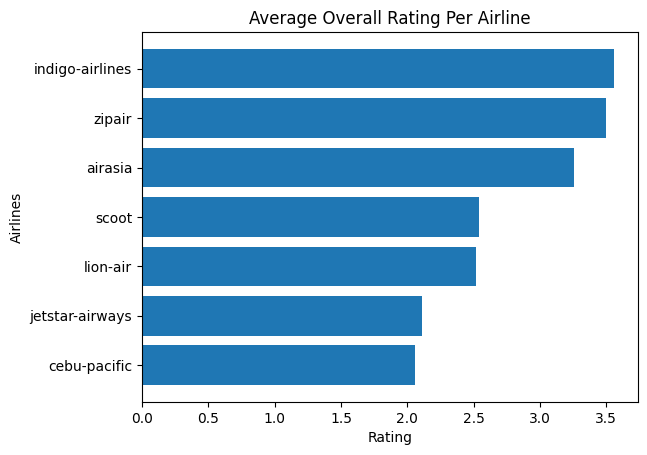

In [199]:
lst = []
for index, row in grouped.iterrows():
    lst.append((row["Airline"], row["Overall Rating"]))
lst.sort(key = lambda x: x[1])
print(lst)
plt.barh(list(map(lambda x: x[0], lst)), list(map(lambda x: x[1], lst)))
plt.xlabel("Rating")
plt.ylabel('Airlines')
plt.title("Average Overall Rating Per Airline")
plt.show()  

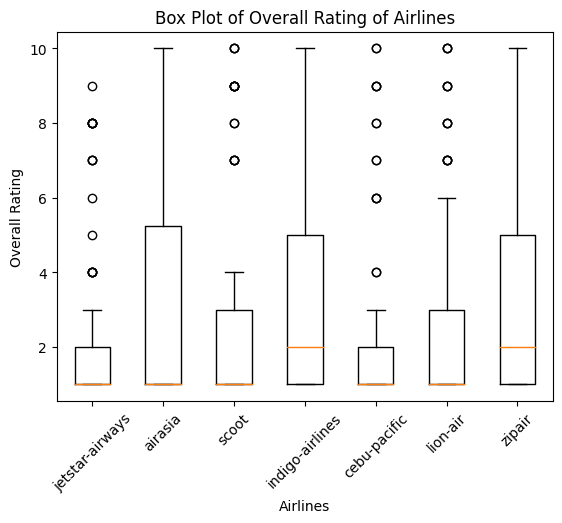

In [200]:
# Your airline list
airline_lst = ["jetstar-airways", "airasia", "scoot", "indigo-airlines", "cebu-pacific", "lion-air", "zipair"]

data = {}

for index, row in raw_data.iterrows():
    airline = row["Airline"]
    if airline in airline_lst:
        if airline not in data:
            data[airline] = []
        data[airline].append(row["Overall Rating"])

# Create box plots for all airlines in the list
plt.boxplot([data.get(airline, []) for airline in airline_lst], labels=airline_lst)

# Adding labels and title
plt.xlabel('Airlines')
plt.ylabel('Overall Rating')
plt.title('Box Plot of Overall Rating of Airlines')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

[('jetstar-airways', 1.711111111111111), ('cebu-pacific', 1.9325842696629214), ('lion-air', 1.945054945054945), ('scoot', 2.0319148936170213), ('airasia', 2.1777777777777776), ('indigo-airlines', 2.431578947368421), ('zipair', 2.671875)]


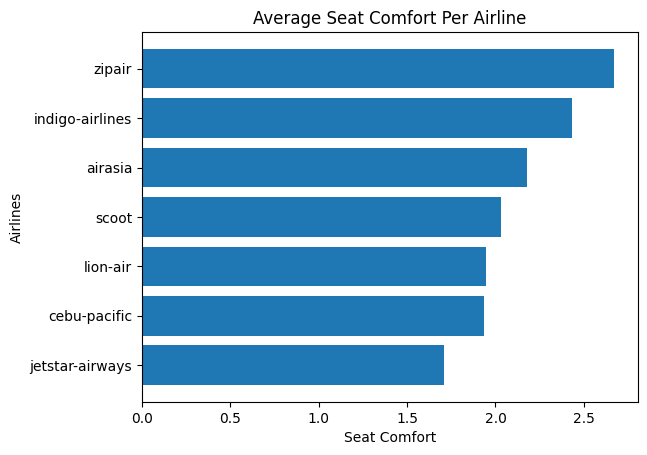

[('lion-air', 2.157303370786517), ('jetstar-airways', 2.197674418604651), ('cebu-pacific', 2.272727272727273), ('scoot', 2.3076923076923075), ('indigo-airlines', 2.595744680851064), ('zipair', 2.734375), ('airasia', 2.8160919540229883)]


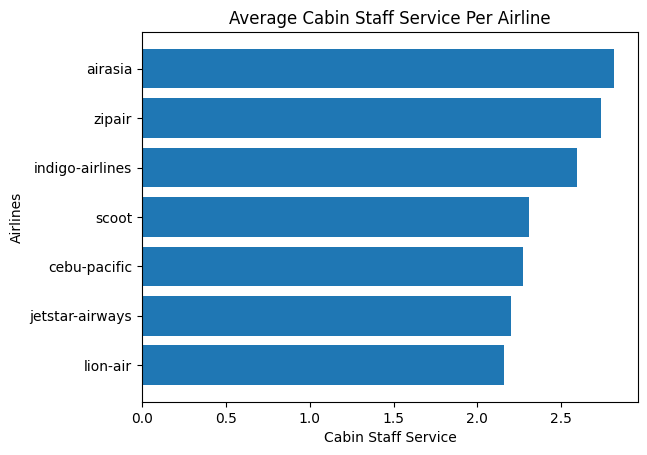

[('lion-air', 1.28), ('jetstar-airways', 1.5862068965517242), ('cebu-pacific', 1.6470588235294117), ('scoot', 1.6666666666666667), ('indigo-airlines', 2.0307692307692307), ('zipair', 2.302325581395349), ('airasia', 2.3636363636363638)]


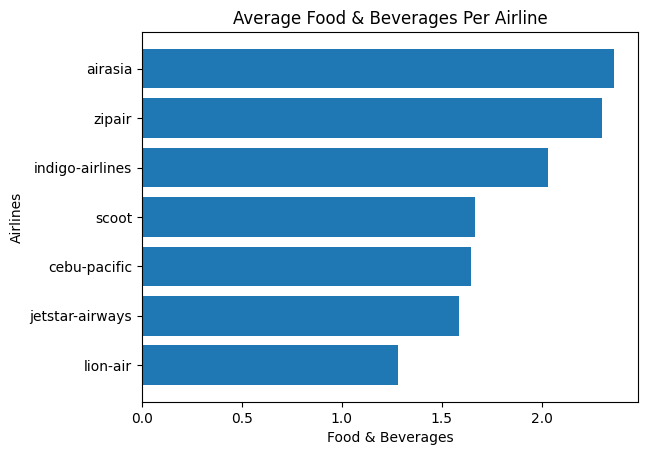

[('cebu-pacific', 1.6914893617021276), ('jetstar-airways', 1.7473684210526317), ('lion-air', 1.7525773195876289), ('scoot', 2.0), ('airasia', 2.0842105263157893), ('zipair', 2.2285714285714286), ('indigo-airlines', 2.2323232323232323)]


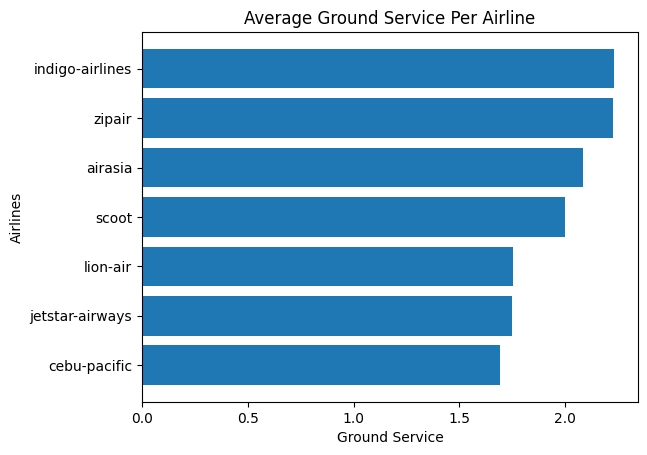

[('jetstar-airways', 1.121212121212121), ('cebu-pacific', 1.175), ('lion-air', 1.1764705882352942), ('airasia', 1.3703703703703705), ('indigo-airlines', 1.3823529411764706), ('scoot', 1.6), ('zipair', 2.3902439024390243)]


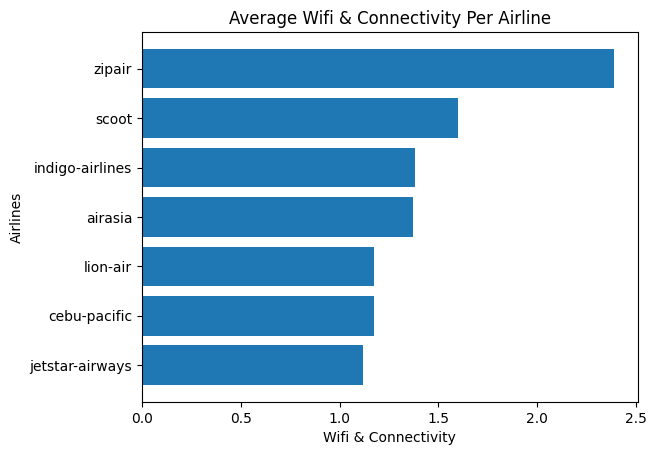

[('cebu-pacific', 1.186046511627907), ('lion-air', 1.1904761904761905), ('airasia', 1.2692307692307692), ('indigo-airlines', 1.425), ('jetstar-airways', 1.5), ('scoot', 1.5), ('zipair', 1.7096774193548387)]


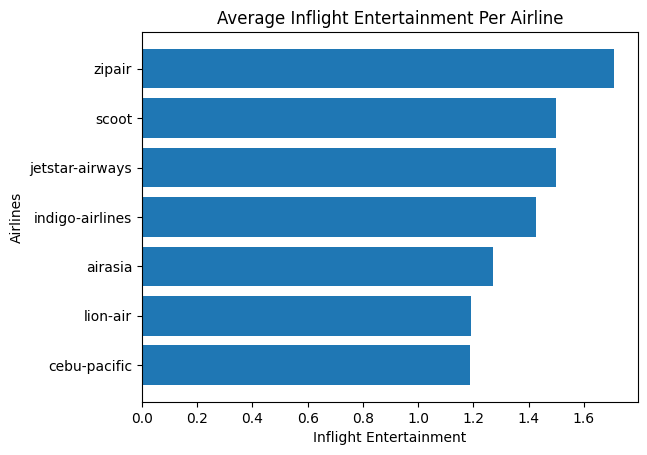

In [201]:
metric_list = ["Seat Comfort","Cabin Staff Service","Food & Beverages","Ground Service","Wifi & Connectivity","Inflight Entertainment"]
for metric in metric_list:
    lst = []
    for index, row in grouped.iterrows():
        lst.append((row["Airline"], row[metric]))
    lst.sort(key = lambda x: x[1])
    print(lst)
    plt.barh(list(map(lambda x: x[0], lst)), list(map(lambda x: x[1], lst)))
    plt.xlabel(metric)
    plt.ylabel('Airlines')
    plt.title(f"Average {metric} Per Airline")
    plt.show()  